#Random Forest Classification





Classification of Parkinson's Disease using Random Forest Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load and prepare the data
def load_data(file_path):
    data = pd.read_csv('classification_dataset.data')
    X = data.iloc[:, 1:-1]
    y = data.iloc[:, -1]
    return X, y

In [ ]:
# Preprocess the data
def preprocess_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

In [ ]:
# Train the model
def train_model(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

In [ ]:
# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return y_pred, accuracy

In [ ]:
# Plot confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# Plot feature importance
def plot_feature_importance(model, X):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 7))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
    plt.title('Top 10 Most Important Features')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



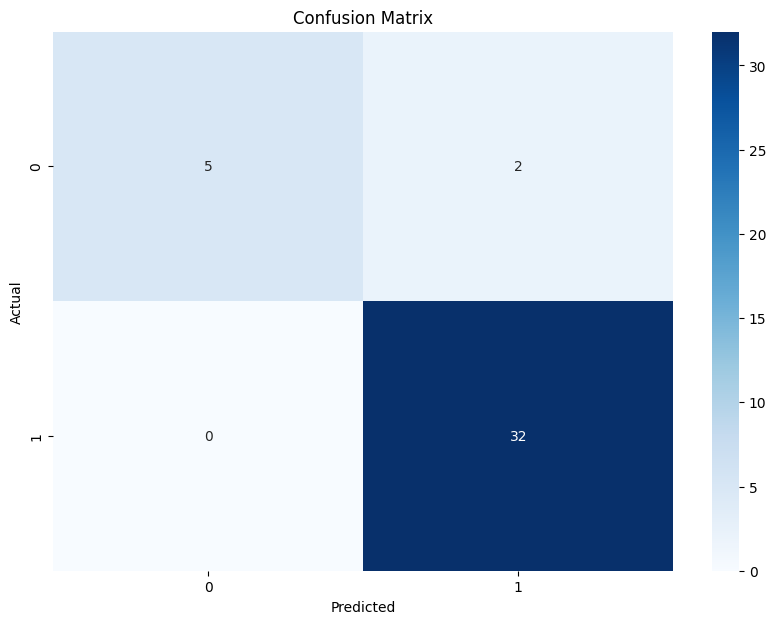

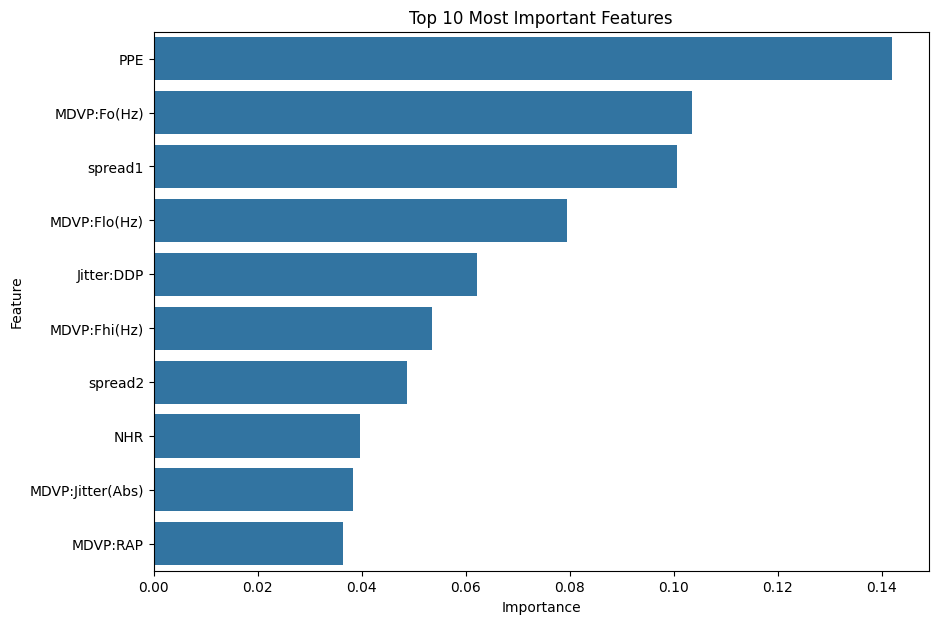

In [ ]:
# Main function
def main():
    X, y = load_data('classification_dataset.data')

    X_scaled = preprocess_data(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model = train_model(X_train, y_train)

    y_pred, accuracy = evaluate_model(model, X_test, y_test)

    print(f"Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    plot_confusion_matrix(y_test, y_pred)
    plot_feature_importance(model, X)

if __name__ == "__main__":
    main()

#Random Forest Regression

Progression Prediction using Random Forest Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('Progression_Dataset.csv')

In [ ]:
# Define features and target variables
target_vars = ['motor_UPDRS', 'total_UPDRS']
feature_vars = [col for col in data.columns if col not in target_vars and col != 'Subject']

X = data[feature_vars]
y = data[target_vars]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train the Random Forest model
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

Mean Squared Error:
Motor_UPDRS: 0.1440
Total_UPDRS: 0.1004

R-squared Score:
Motor_UPDRS: 0.9977
Total_UPDRS: 0.9991

Top 10 Most Important Features:
        feature  importance
0      subject#    0.487805
1           age    0.366668
3     test_time    0.063924
18          DFA    0.041631
2           sex    0.020397
17         RPDE    0.010335
5   Jitter(Abs)    0.002410
16          HNR    0.002344
19          PPE    0.000789
14  Shimmer:DDA    0.000614


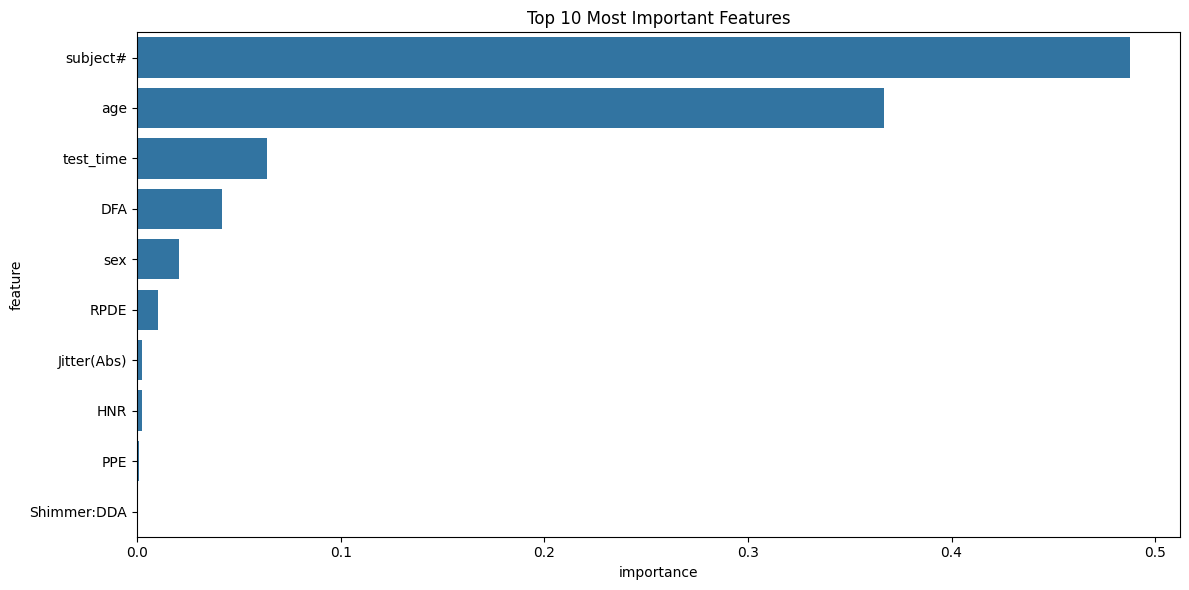

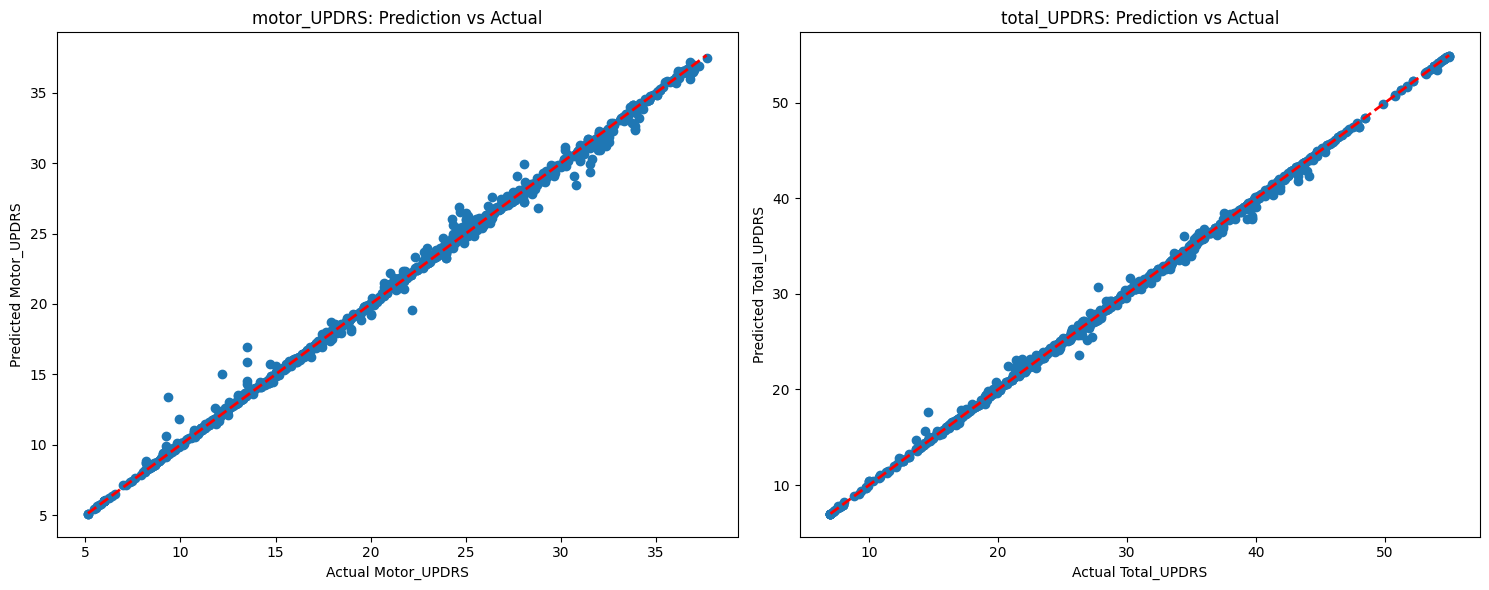

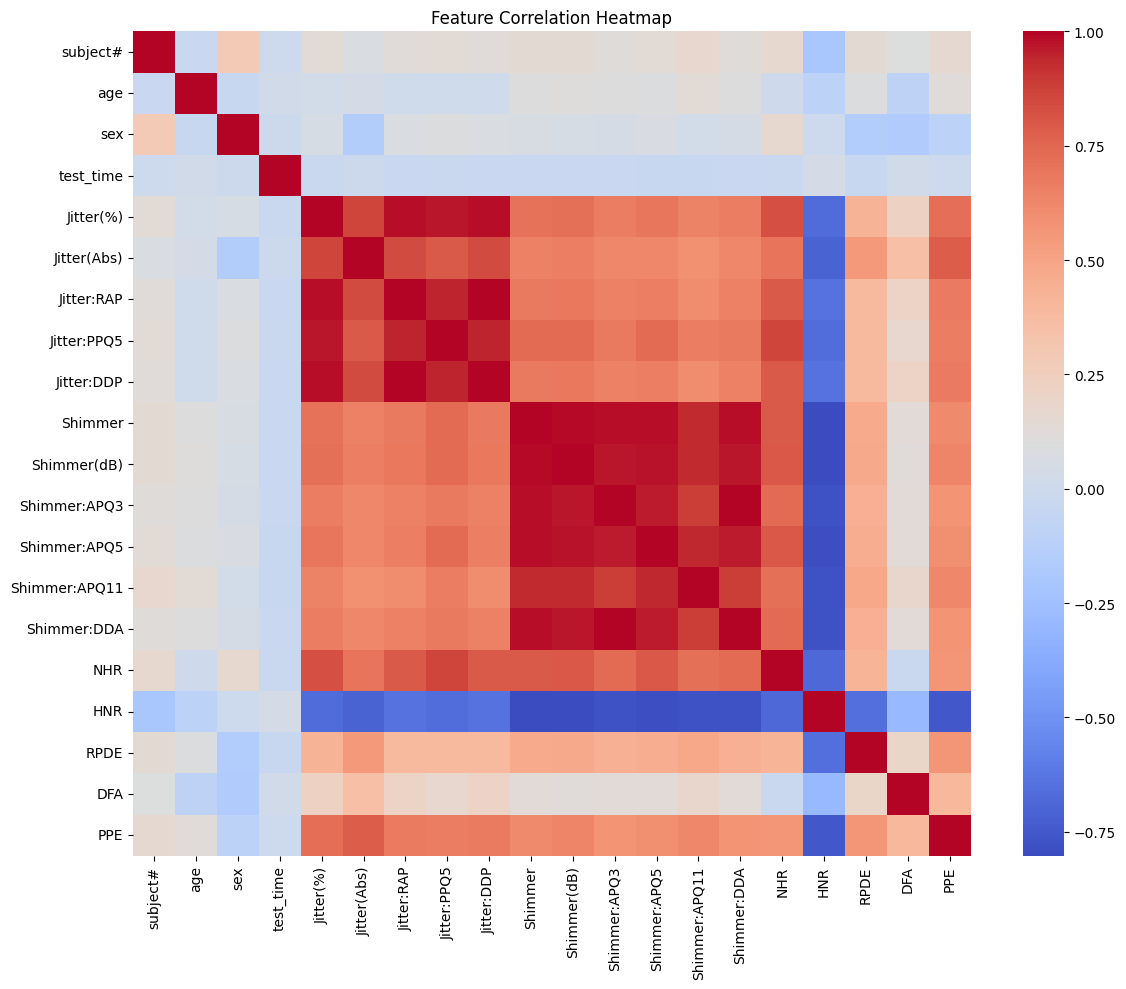


Prediction for a single sample:
Predicted Motor_UPDRS: 33.0341
Predicted Total_UPDRS: 43.5782


In [ ]:
print("Mean Squared Error:")
print(f"Motor_UPDRS: {mse[0]:.4f}")
print(f"Total_UPDRS: {mse[1]:.4f}")
print("\nR-squared Score:")
print(f"Motor_UPDRS: {r2[0]:.4f}")
print(f"Total_UPDRS: {r2[1]:.4f}")

# Feature importance
importances = np.mean([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
feature_importance = pd.DataFrame({
    'feature': feature_vars,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Visualizations
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

# Prediction vs Actual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(y_test['motor_UPDRS'], y_pred[:, 0])
ax1.plot([y_test['motor_UPDRS'].min(), y_test['motor_UPDRS'].max()],
         [y_test['motor_UPDRS'].min(), y_test['motor_UPDRS'].max()],
         'r--', lw=2)
ax1.set_xlabel('Actual Motor_UPDRS')
ax1.set_ylabel('Predicted Motor_UPDRS')
ax1.set_title('motor_UPDRS: Prediction vs Actual')

ax2.scatter(y_test['total_UPDRS'], y_pred[:, 1])
ax2.plot([y_test['total_UPDRS'].min(), y_test['total_UPDRS'].max()],
         [y_test['total_UPDRS'].min(), y_test['total_UPDRS'].max()],
         'r--', lw=2)
ax2.set_xlabel('Actual Total_UPDRS')
ax2.set_ylabel('Predicted Total_UPDRS')
ax2.set_title('total_UPDRS: Prediction vs Actual')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Predict on a single sample (example)
sample = X_test_scaled[0].reshape(1, -1)
prediction = rf_model.predict(sample)
print("\nPrediction for a single sample:")
print(f"Predicted Motor_UPDRS: {prediction[0][0]:.4f}")
print(f"Predicted Total_UPDRS: {prediction[0][1]:.4f}")